# 1. Prepare SSH connection

In [24]:
import logging
reload(logging)
logging.basicConfig(
    format='%(asctime)-9s %(levelname)-8s: %(message)s',
    datefmt='%I:%M:%S')

# Enable logging at INFO level
logging.getLogger().setLevel(logging.ERROR)
# Comment the follwing line to disable devlib debugging statements
logging.getLogger('ssh').setLevel(logging.ERROR)

In [25]:
# Generate plots inline
%pylab inline

import json
import os
import subprocess

# Support to access the remote target
import devlib
from env import TestEnv

# Support for trace events analysis
from trace import Trace
#from trace_analysis import TraceAnalysis

# Support to configure and run RTApp based workloads
from wlgen import RTA, Ramp, Step, Pulse, Periodic

# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

Populating the interactive namespace from numpy and matplotlib


In [26]:
# Let's use an example trace
#!pwd
#tracefile = os.path.join(res_dir, 'trace.dat')
platformfile = os.path.join("../../results/eas_acceptance/rtapp:energy_aware:early_and_migrators", 'platform.json')

In [27]:
# Trace events of interest
events_to_parse = [
                "sched_overutilized",
                "sched_energy_diff",
                "sched_load_avg_task",
                "sched_load_avg_cpu",
                "sched_migrate_task",
                "sched_switch"
]

# Platform description
with open(platformfile, 'r') as fh:
    platform = json.load(fh)

# Time range from the analysis
(t_min, t_max) = (0, None)

platform['nrg_model']['little']['cpu']['cap_max'] = 1024
platform['clusters']['little'] = [0, 1, 2, 3]
        
platform['nrg_model']['big']['cpu']['cap_max'] = 1024
platform['clusters']['big'] = [4, 5, 6, 7]
platform['cpus_count'] = 8

logging.info("CPUs max capacities:")
logging.info("   big: %5d (cpus: %s)",
             platform['nrg_model']['big']['cpu']['cap_max'],
             platform['clusters']['big'])
logging.info("LITTLE: %5d (cpus: %s)",
             platform['nrg_model']['little']['cpu']['cap_max'],
             platform['clusters']['little'])

Maximum estimated system energy: 5584
Maximum estimated system energy: 5584
Maximum estimated system energy: 5584
Maximum estimated system energy: 5584


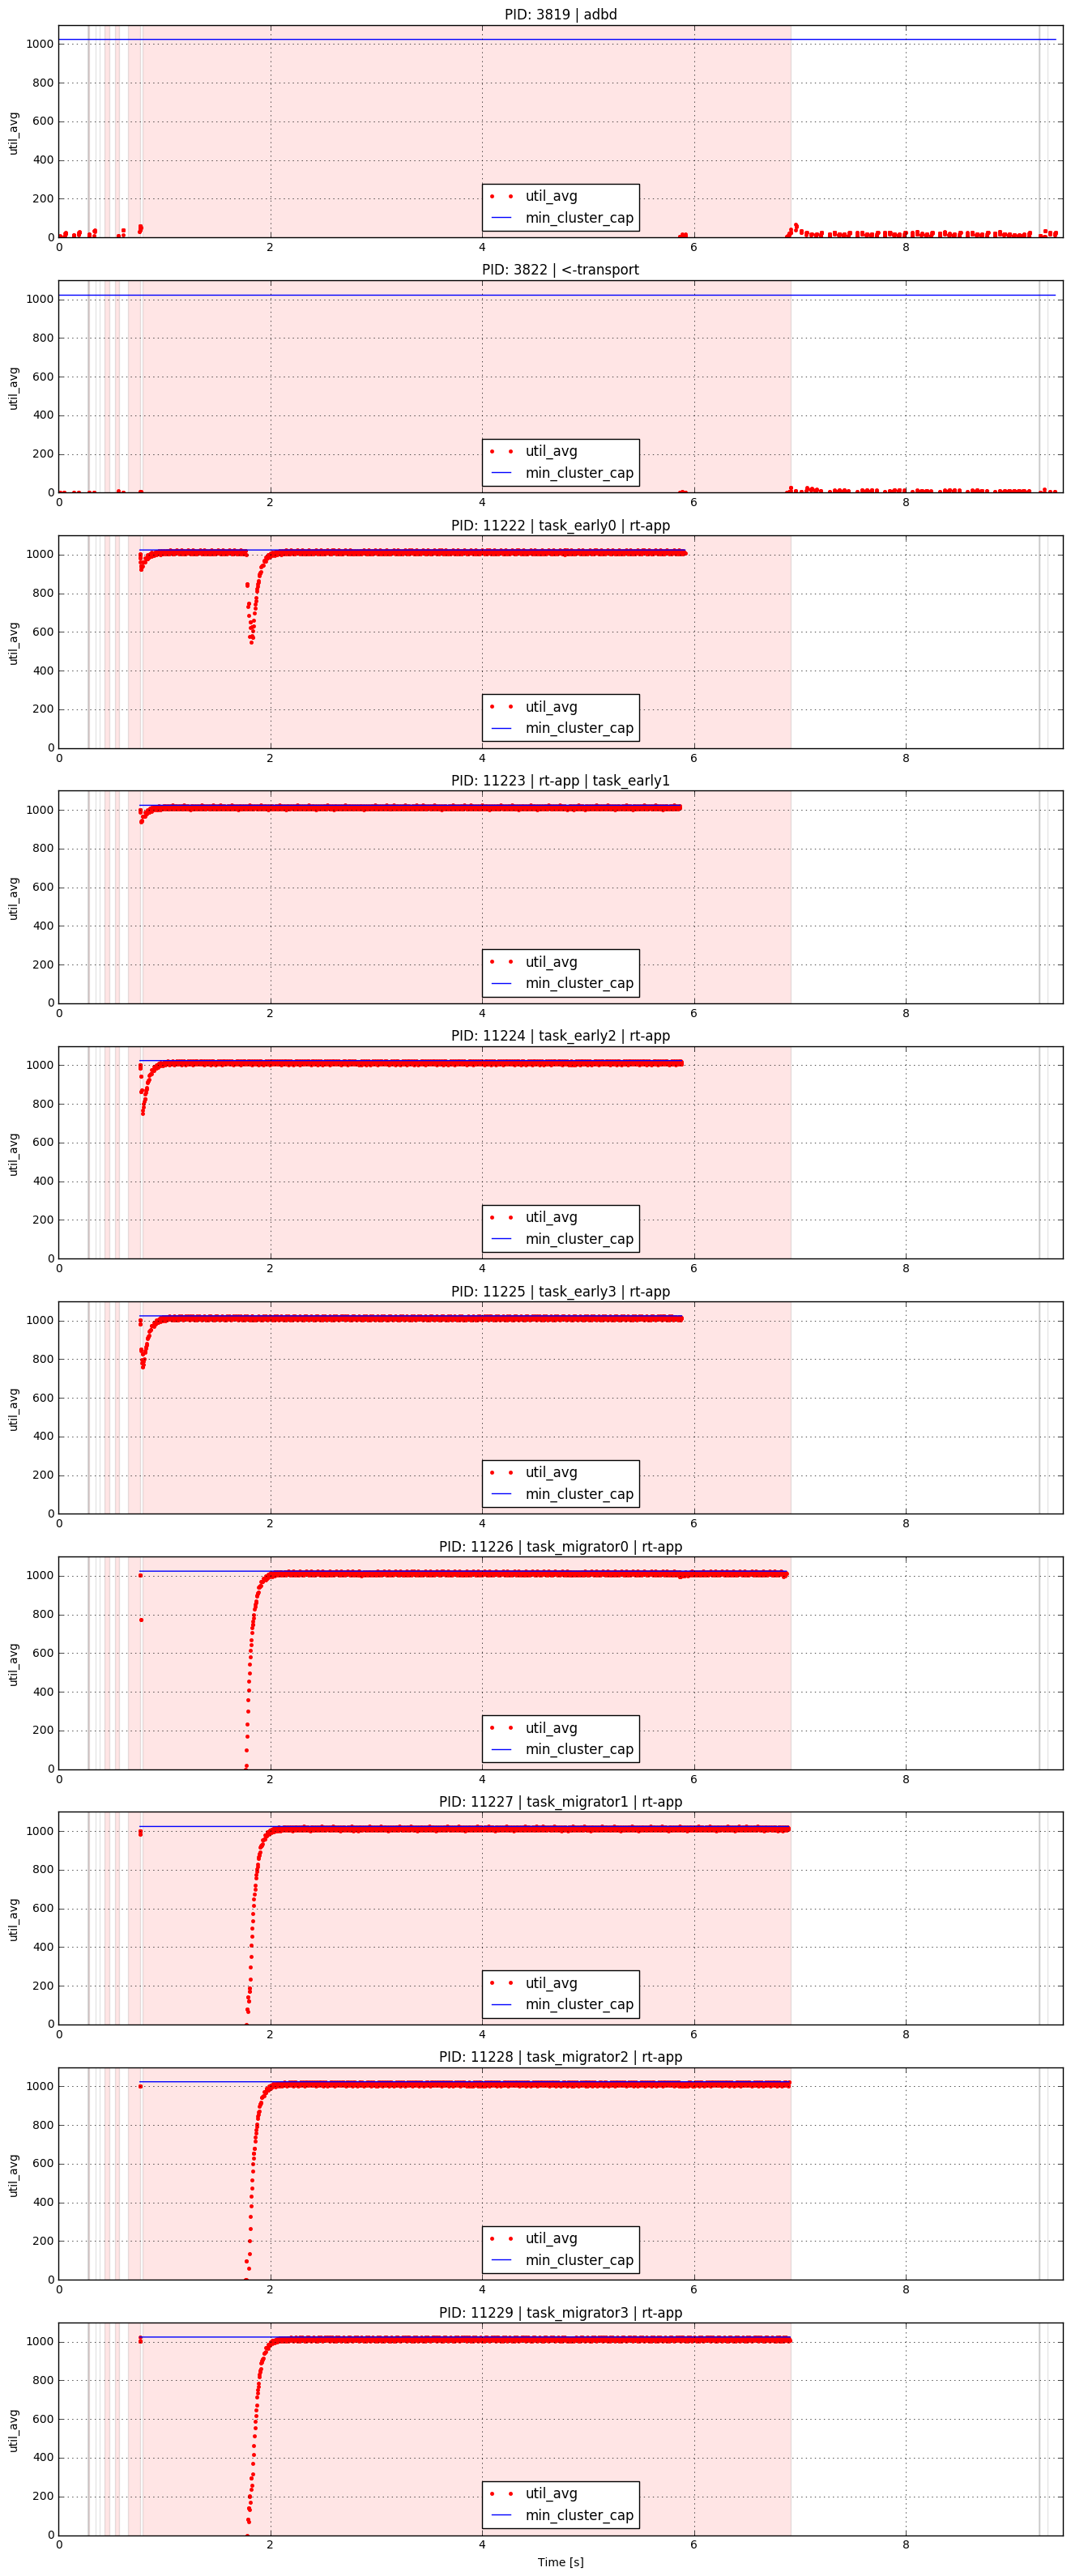

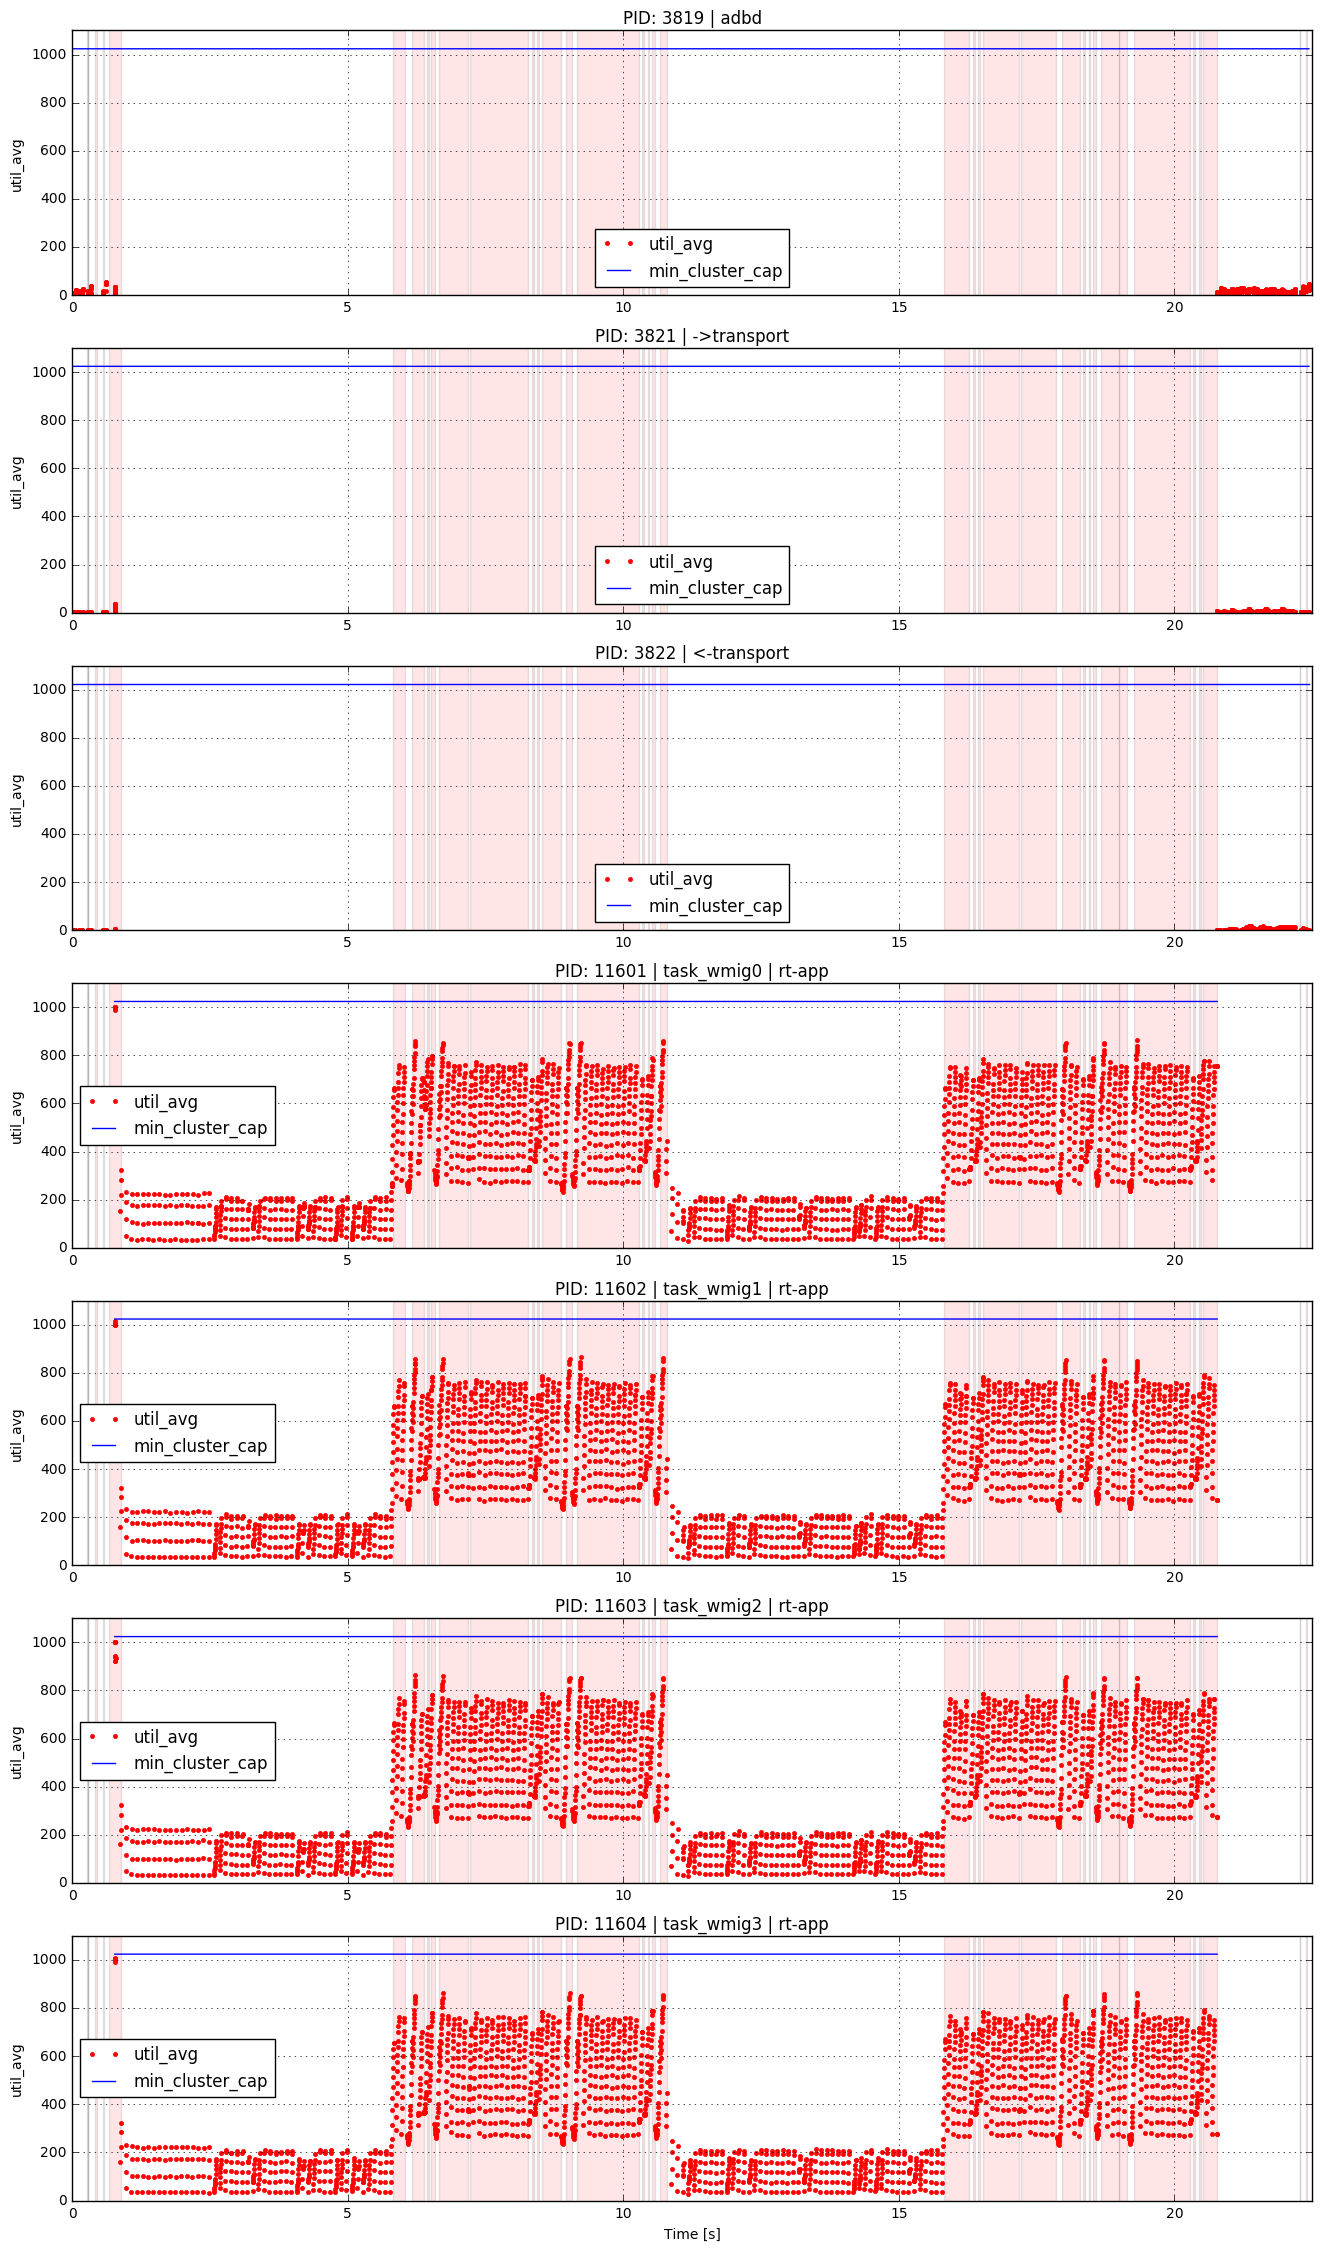

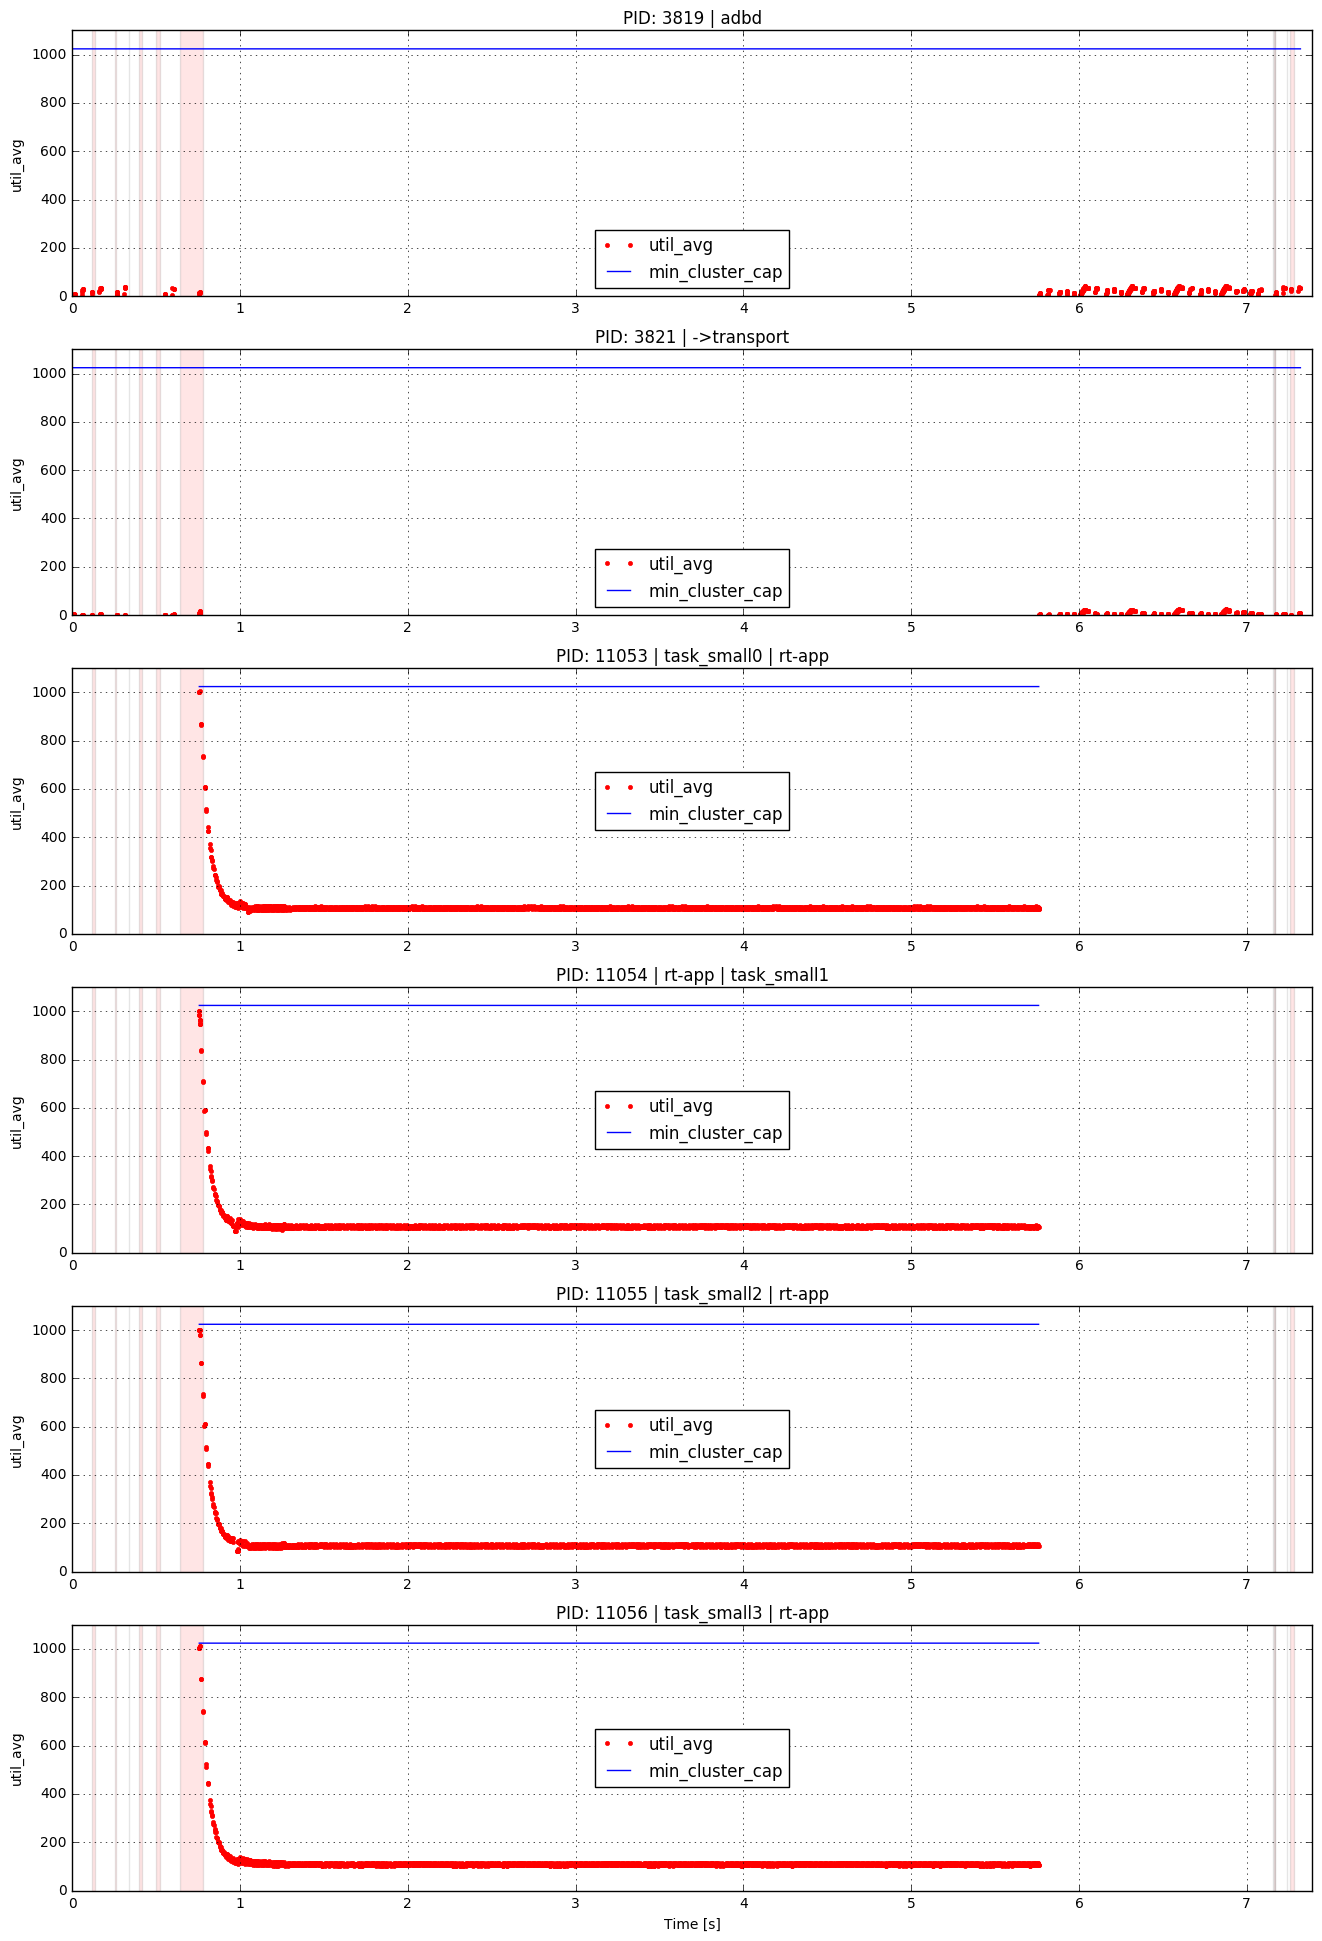

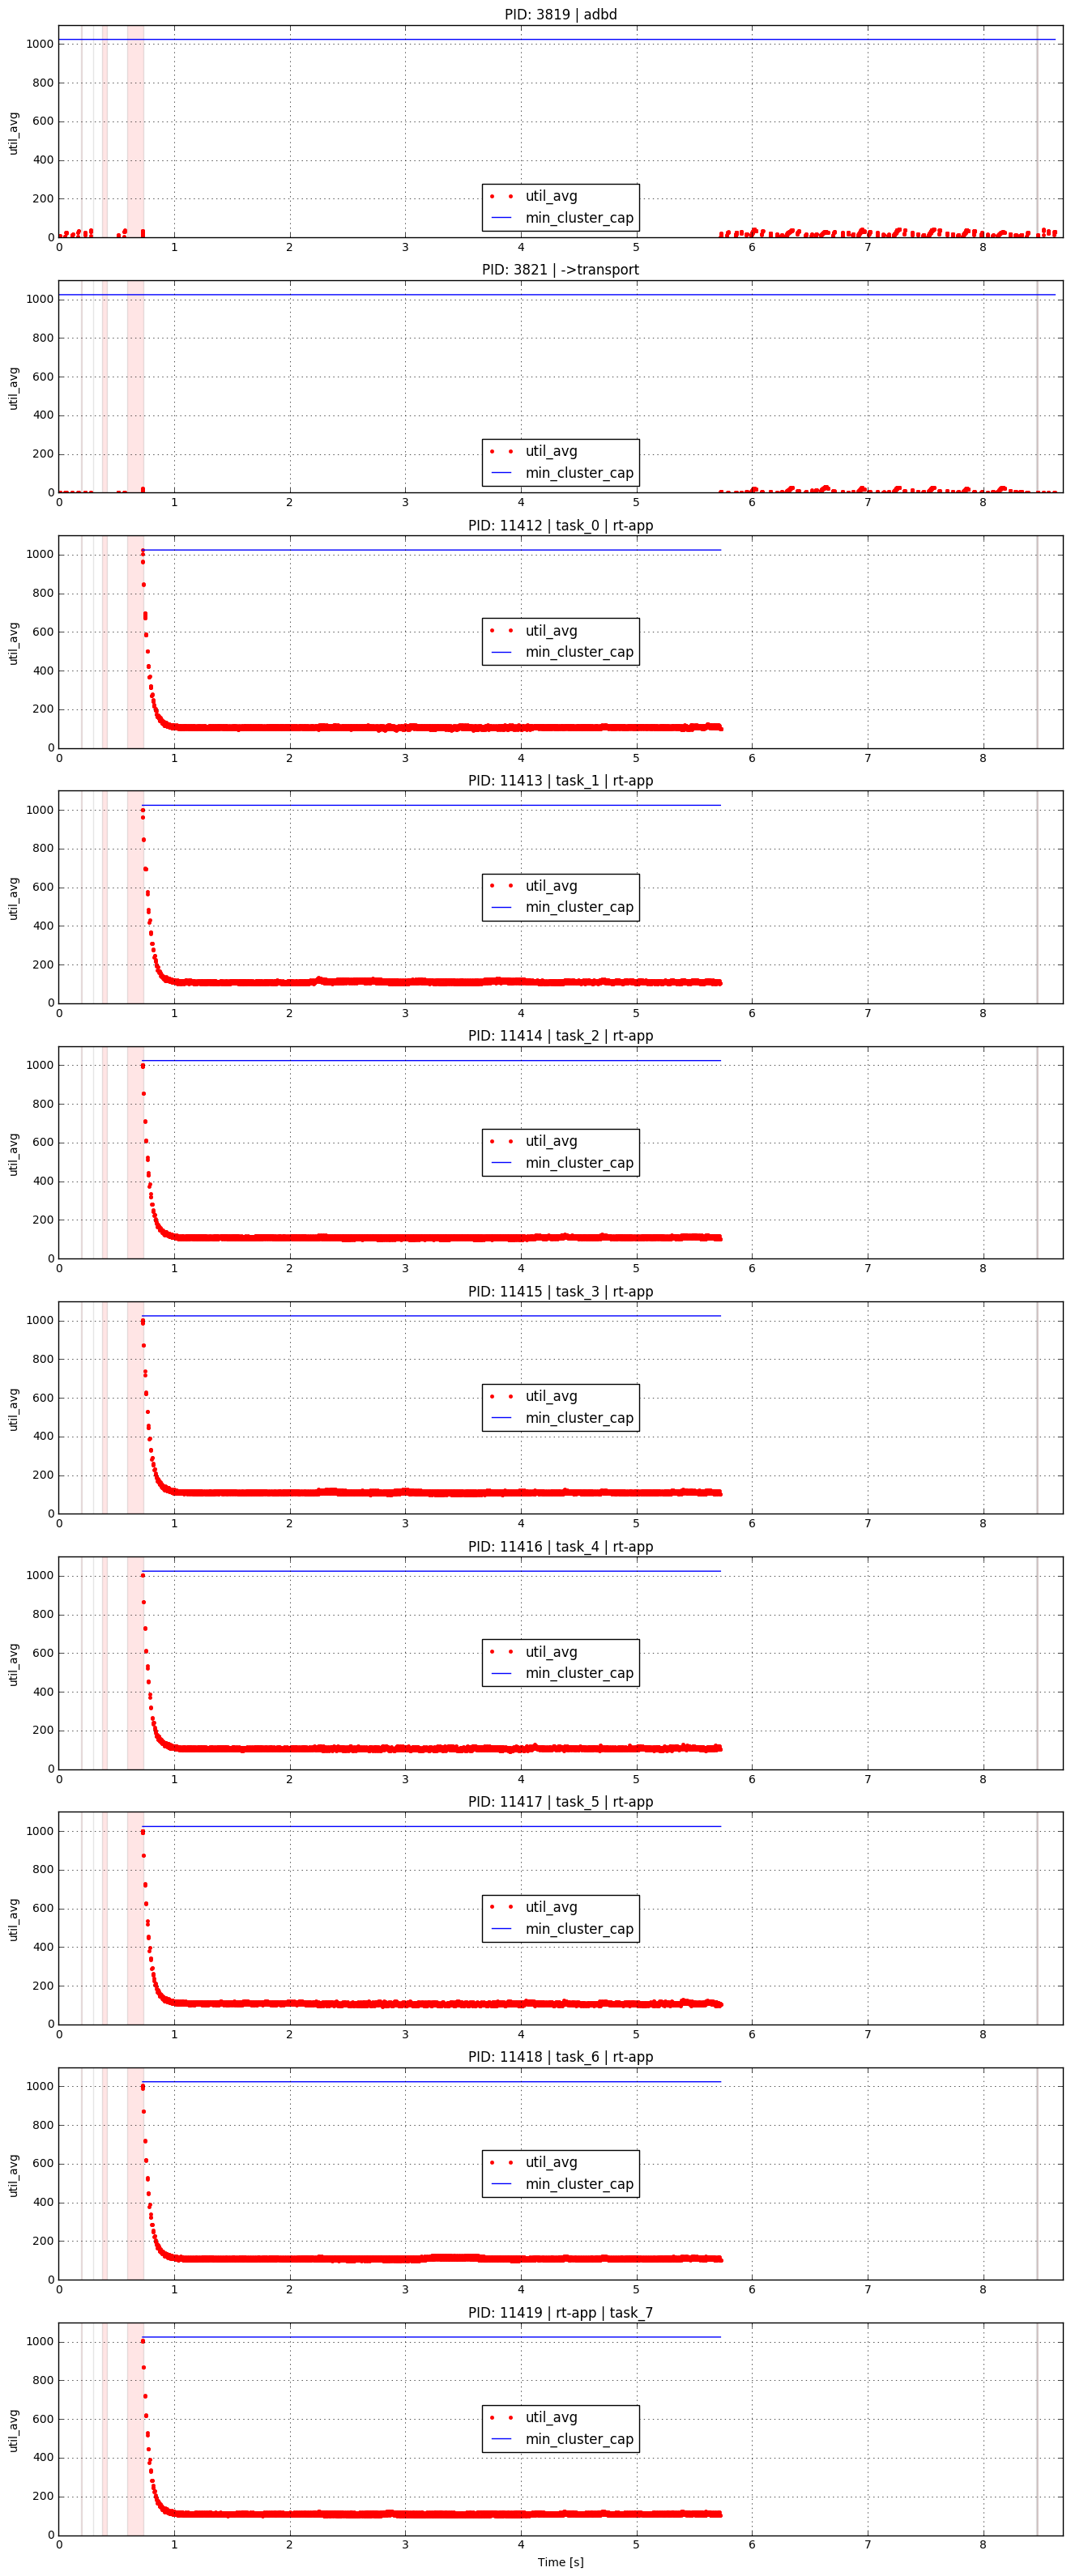

In [28]:
# Load the LISA::Trace parsing module
from trace import Trace

results_dir="../../results/eas_acceptance"
dirlist=os.listdir(results_dir)

for filename in dirlist:
    #print filename
    filepath=os.path.join(results_dir, filename)
    res_dir=filepath+"/1"
    trace = Trace(platform, res_dir, events_to_parse, window=(t_min,t_max))
    trace.setXTimeRange(t_min, t_max)
    #trace.analysis.frequency.plotClusterFrequencies(filename)
    #trace.analysis.frequency.plotCPUFrequencyResidency(cpus=1)
    #trace.analysis.frequency.plotClusterFrequencyResidency(clusters='LITTLE')
    #trace.analysis.tasks.plotBigTasks(max_tasks=10, min_samples=100, min_utilization=10)
    #trace.analysis.tasks.plotTasks(tasks='rt-app-task0')
    trace.analysis.tasks.plotBigTasks(max_tasks=10, min_samples=100, min_utilization=10)